<a href="https://colab.research.google.com/github/mccoy0928/20220702-Python/blob/main/20220716_McCoy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# https://zerojudge.tw/ 可練習寫寫

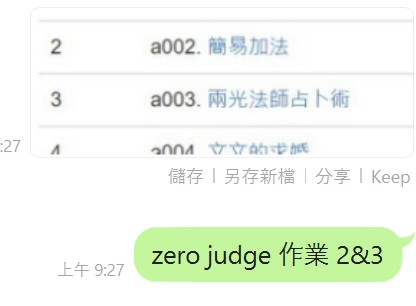

# 基本語法
## 基本語法
### 基本語法
* 迴圈 loops
* 函式 functions
* 條件式 if statements
* 例外處理 Exception Handling

### 例外處理

In [8]:
def add(x, y):
  print(f"{x}+{y}={x+y}")
def sub(x, y):
  print(f"{x}-{y}={x-y}")
def mul(x, y):
  print(f"{x}*{y}={x*y}")
def div(x, y):
  print(f"{x}/{y}={x/y}")

In [9]:
functions = [add, div, mul, sub]

In [10]:
x=5
y=2
for func in functions:
  func(x, y)

5+2=7
5/2=2.5
5*2=10
5-2=3


In [11]:
x=5
y=0
for func in functions:
  try :
    func(x, y)
  except Exception as e:
    print(e.args)

5+0=5
('division by zero',)
5*0=0
5-0=5


# 20220716 資料分析

* Numpy  
 * ==>科學運算基礎套件
* MatPlotLib 
 * ==>Matrix Plotting Library繪圖基礎套件
* Pandas 
 * ==> Panel Datas 資料分析套件

```
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

```

## Numpy
* new data type
 * ndarray
* new functions to process data
 * ufunc=>Universal Functions

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 執行原生python遇上的問題

In [13]:
x1 = [1, 2, 3]
x2 = [4, 5, 6]

In [14]:
x1+x2 #把x1&x2當成list處理相加

[1, 2, 3, 4, 5, 6]

In [15]:
# 向量相加
x3=[]
for i, j in zip(x1, x2):
  x3.append(i + j)
x3 # 真實會要的向量相加

[5, 7, 9]

# Numpy用來做甚麼

### ndarray 多維陣列

In [16]:
import numpy as np

In [17]:
x1

[1, 2, 3]

In [30]:
x2

[4, 5, 6]

In [19]:
y1 =np.array(x1)
y2 = np.array(x2)

In [29]:
y1+y2

array([5, 7, 9])

In [28]:
2*y1

array([2, 4, 6])

### ufunc 通用函式

In [27]:
# 在原生python中
import math

In [23]:
math.sin(math.pi/2)

1.0

In [24]:
math.sin(1)

0.8414709848078965

In [26]:
math.sin(x1)

TypeError: ignored

In [ ]:
# 在numpy中
np.sin(x1)

In [ ]:
np.sin(np.pi/2)

### 什麼地方會用到ndarrary

In [ ]:
import cv2

In [ ]:
im = cv2.imread('test.jpg')  #image read

In [ ]:
type(im)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(im)

# 如何用python畫地圖

## LBS:Location-Based service
Folium
https://python-visualization.github.io/folium/quickstart.html#Getting-Started

In [31]:
import folium
m = folium.Map(location=[22.6273, 120.304], zoom_start=16)

In [32]:
m

In [33]:
# 存網頁
m.save("map.html")

In [34]:
m = folium.Map(location=[22.6273, 120.314], zoom_start=16)
folium.Marker([22.6273, 120.314], popup="高雄市").add_to(m)
m
#m.save("map.html")

### 使用geocoder查詢GPS座標

In [ ]:
!pip install geocoder

In [ ]:
import geocoder

In [ ]:
test= geocoder.osm("台北市").latlng
type(test)

### 練習請畫出台北市中心點地圖

In [ ]:
lookup="台北市"
#lookup= input()
locationpoint=geocoder.osm(lookup).latlng
m = folium.Map(location=locationpoint, zoom_start=12)
folium.Marker(locationpoint, popup=lookup).add_to(m)
m

In [ ]:
def drawmap(lookup):
  locationpoint=geocoder.osm(lookup).latlng
  m = folium.Map(location=locationpoint, zoom_start=16)
  folium.Marker(locationpoint, popup=lookup).add_to(m)
  return m

In [ ]:
drawmap("文藻外語大學")

##練習 到政府資料開放平台，下載北市U-Bike資料到地圖上

https://data.gov.tw/dataset/137993
https://tcgbusfs.blob.core.windows.net/dotapp/youbike/v2/youbike_immediate.json

In [ ]:
import requests

In [ ]:
url = "https://tcgbusfs.blob.core.windows.net/dotapp/youbike/v2/youbike_immediate.json"

In [ ]:
data = requests.get(url).json()

In [ ]:
len(data)

In [ ]:
data[0]

In [ ]:
for i in data:
  print(f"{i['sna'][11:]} ==>({i['lat']},{i['lng']})")

In [ ]:
def listout(myDa):
  x=data[myDa]['lat']
  y=data[myDa]['lng']
  z=data[myDa]['sna']
  print(str(x)+" "+str(y)+"\n"+z[11:]) 

In [ ]:
for i in range(len(data)):
  listout(i)


## 測試地圖上標示站名

In [ ]:
def listout(myDa):
  x=data[myDa]['lat']
  y=data[myDa]['lng']
  z=data[myDa]['sna']
  #print(str(x)+" "+str(y)+"\n"+z[11:])
  return x, y, z[11:] 

In [ ]:
listout(100)
x

In [ ]:
#listout(0)
for i in data:
  folium.Marker([i['lat'],i['lng']], popup= i['sna'], icon=folium.Icon(color="red")).add_to(m) 


In [ ]:
m

## python影像處理
*pillow  https://pillow.readthedocs.io/en/stable/


## 載入需要模組

In [35]:
from PIL import Image

## 讀取圖形


In [36]:
im=Image.open("test.jpg")

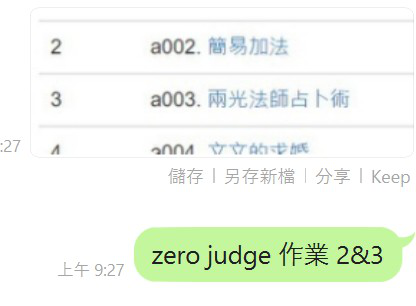

In [37]:
im

## 讀取圖片資訊

In [38]:
im.size

(416, 306)

In [39]:
im.mode

'RGB'

In [40]:
im.format

'JPEG'

## 轉換成黑白

In [41]:
im_gray=im.convert("L")

In [42]:
im_gray.save("testgray.jpg")

## 圖片縮放
* resize
  * Signature: im.resize(size, resample=3, box=None, reducing_gap=None)
  * Docstring:
Returns a resized copy of this image.

  * :param size: The requested size in pixels, as a 2-tuple:
   (width, height)
* thumbnail
  * Signature: im.thumbnail(size, resample=3, reducing_gap=2.0)
  * :param size: Requested size.


In [43]:
im.size

(416, 306)

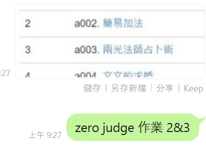

In [44]:
im.resize((206,153)) 

In [45]:
im2=Image.open("5213.jpg")

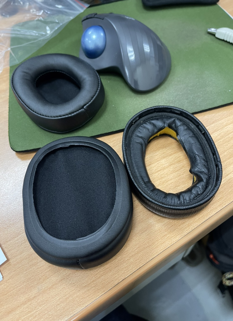

In [46]:
im2.resize((233,321))

In [47]:
im2.size

(1108, 1478)

In [48]:
# width
a=im.size[0]

In [49]:
# height
b=im.size[1]

In [50]:
im2 = im.resize((a//4, b//4))  # // 整除為int

In [51]:
im2.size

(104, 76)

## thumbnail 依照原圖比例縮放

In [52]:
im.thumbnail?

In [53]:
im3 = im2.copy()

In [54]:
im3.thumbnail((100,80))

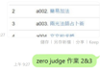

In [55]:
im3

## 分離&合併色層

In [56]:
r,g,b=im3.split()
im4 = Image.merge("RGB", (b, g, r))

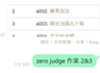

In [57]:
im4

## 圖片旋轉
* transpose
```
out = im.transpose(Image.FLIP_LEFT_RIGHT)
out = im.transpose(Image.FLIP_TOP_BOTTOM)
out = im.transpose(Image.ROTATE_90)
out = im.transpose(Image.ROTATE_180)
out = im.transpose(Image.ROTATE_270)

```
* rotate


In [58]:
im3.transpose?

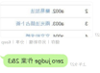

In [59]:
im3.transpose(Image.FLIP_LEFT_RIGHT)

In [60]:
im3.rotate?

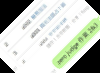

In [61]:
im3.rotate(45)

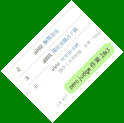

In [62]:
im3.rotate(45, expand=True, fillcolor="green")

## 貼圖

In [63]:
im2.size

(104, 76)

In [64]:
im4.size

(100, 73)

In [65]:
im2.paste?

In [66]:
im5 = im2.copy()

In [67]:
im5.paste(im4,(100, 100))

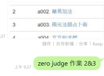

In [68]:
im5

## 製作QR code
https://pypi.org/project/qrcode/

In [69]:
!pip install qrcode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
import qrcode
img=qrcode.make("http://lasertek.com.tw/website/home/index.php")
img.save("lasertek.png")

In [71]:
im6=Image.open('lasertek.png')

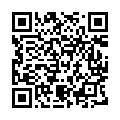

In [72]:
im6.resize((120,120))

In [73]:
im7=im2.copy()

In [74]:
im7.paste(im6,(200,300))

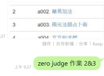

In [75]:
im7

## Home Work:
用gradio做一個app, 輸入一張圖片，輸出加上QRcode的圖片


In [76]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
import gradio as gr
import os

ImportError: ignored

In [78]:
# Hint

def process(input):
  r,g,b=im3.split()
  return Image.merge("RGB", (b, g, r))

In [ ]:
gradio.Interface(process, gradio.inputs.Image(type='pil'), gradio.outputs.Image(type='pil'), title="變色處理").launch(share=True)

In [79]:
from PIL import ImageDraw

In [80]:
im8=im2.copy()

In [82]:
im9=ImageDraw.Draw(im8)

In [84]:
im9.text((10,10),"Test My Text",(255,0,0))

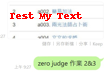

In [88]:
im8

In [86]:
def hello(name):
  """印出使用說明
  Test abc
  print
  
  
  """
  print("hello, ", name)

In [87]:
hello("My")

hello,  My
